In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("playlist_exit_ticket.csv", encoding='latin-1')

features = ['average_track_popularity', 'average_artist_popularity', 'average_danceability']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in np.arange(0.1, 1.1, 0.1):  
    for min_samples in range(2, 6):  
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        if len(np.unique(labels)) > 1:  
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps:.1f}, min_samples={min_samples}, Silhouette Score={score:.3f}")

            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples
        else:
            print(f"eps={eps:.1f}, min_samples={min_samples}, No valid clusters found.")

print("\nBest Parameters:")
print(f"eps={best_params['eps']}, min_samples={best_params['min_samples']}, Best Silhouette Score={best_score:.3f}")

final_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['cluster'] = final_dbscan.fit_predict(X_scaled)

print("\nCluster Distribution:")
print(df['cluster'].value_counts())


eps=0.1, min_samples=2, No valid clusters found.
eps=0.1, min_samples=3, No valid clusters found.
eps=0.1, min_samples=4, No valid clusters found.
eps=0.1, min_samples=5, No valid clusters found.
eps=0.2, min_samples=2, Silhouette Score=-0.049
eps=0.2, min_samples=3, No valid clusters found.
eps=0.2, min_samples=4, No valid clusters found.
eps=0.2, min_samples=5, No valid clusters found.
eps=0.3, min_samples=2, Silhouette Score=0.069
eps=0.3, min_samples=3, No valid clusters found.
eps=0.3, min_samples=4, No valid clusters found.
eps=0.3, min_samples=5, No valid clusters found.
eps=0.4, min_samples=2, Silhouette Score=0.069
eps=0.4, min_samples=3, No valid clusters found.
eps=0.4, min_samples=4, No valid clusters found.
eps=0.4, min_samples=5, No valid clusters found.
eps=0.5, min_samples=2, Silhouette Score=-0.032
eps=0.5, min_samples=3, No valid clusters found.
eps=0.5, min_samples=4, No valid clusters found.
eps=0.5, min_samples=5, No valid clusters found.
eps=0.6, min_samples=2, Si

Cluster Distribution:
 0    17
-1     4
 1     3
Name: cluster, dtype: int64

Cluster 0:
       average_track_popularity  average_artist_popularity  \
count                 17.000000                  17.000000   
mean                  69.820000                  73.247059   
std                    3.336175                   4.455749   
min                   64.640000                  65.650000   
25%                   67.650000                  69.480000   
50%                   69.810000                  72.700000   
75%                   72.900000                  76.600000   
max                   76.100000                  79.280000   

       average_danceability  
count             17.000000  
mean               0.649764  
std                0.014170  
min                0.629750  
25%                0.634530  
50%                0.650760  
75%                0.658750  
max                0.672810  

Cluster 1:
       average_track_popularity  average_artist_popularity  \
count   

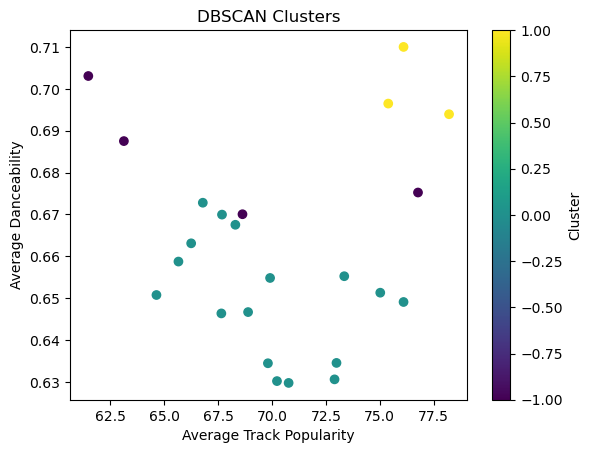

In [6]:
# Analyze clusters
print("Cluster Distribution:")
print(df['cluster'].value_counts())

# Examine cluster characteristics
for cluster in df['cluster'].unique():
    if cluster != -1:  # Ignore noise
        print(f"\nCluster {cluster}:")
        cluster_data = df[df['cluster'] == cluster]
        print(cluster_data[features].describe())

# Visualize clusters (2D example)
import matplotlib.pyplot as plt

plt.scatter(df['average_track_popularity'], df['average_danceability'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Average Track Popularity')
plt.ylabel('Average Danceability')
plt.title('DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature
0,Playlist 1,"['Oops!...I Did It Again', 'All The Small Thin...",65.66,"['Oops!... I Did It Again', 'Enema Of The Stat...","['Britney Spears', 'blink-182', 'Faith Hill', ...",'dancepop',66.17,0.65875,0,122.75544,4
1,Playlist 2,"[""It Wasn't Me"", 'Murder On The Dancefloor', '...",66.79,"['Hot Shot', 'Read My Lips', 'The Marshall Mat...","['Shaggy', 'Sophie Ellis-Bextor', 'Eminem', 'K...",'dancepop',65.65,0.67281,1,115.99193,4
2,Playlist 3,"['Dilemma', 'Without Me', 'Complicated', 'A Th...",64.64,"['Nellyville', 'The Eminem Show', 'Let Go', 'B...","['Nelly', 'Eminem', 'Avril Lavigne', 'Vanessa ...",'dancepop',69.48,0.65076,2,119.75400,4
3,Playlist 4,"['In Da Club', 'Seven Nation Army', 'Lose Your...",66.25,"[""Get Rich Or Die Tryin'"", 'Elephant', 'Curtai...","['50 Cent', 'The White Stripes', 'Eminem', 'Be...",'dancepop',68.93,0.66311,6,116.05242,4
4,Playlist 5,"['Yeah! (feat. Lil Jon & Ludacris)', 'This Lov...",67.68,"['Confessions (Expanded Edition)', 'Songs Abou...","['USHER', 'Maroon 5', 'Rascal Flatts', 'Britne...",'dancepop',69.48,0.66997,1,117.81705,4
